<a href="https://colab.research.google.com/github/MariamHabshi17/Walmart_Sales_Analysis/blob/main/DSMFinProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*   **Name : Mariam Mahmoud El-Habashi**
*   **ID : 22010394**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

In [2]:
dataset=pd.read_csv("walmart-sales.csv")

**show data**

In [3]:
dataset.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [4]:
dataset.shape

(6435, 8)

In [5]:
dataset.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


**Check data**

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [7]:
dataset.isna().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [8]:
dataset.duplicated().sum()

0

# BoxPlot to detect if there're any outliers

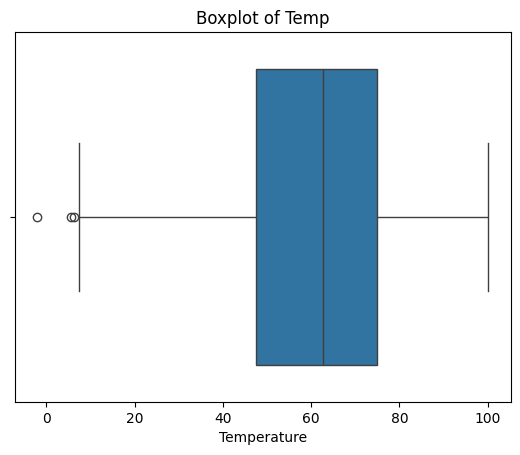

In [9]:
sb.boxplot(x=dataset['Temperature'])
plt.title('Boxplot of Temp')
plt.show()

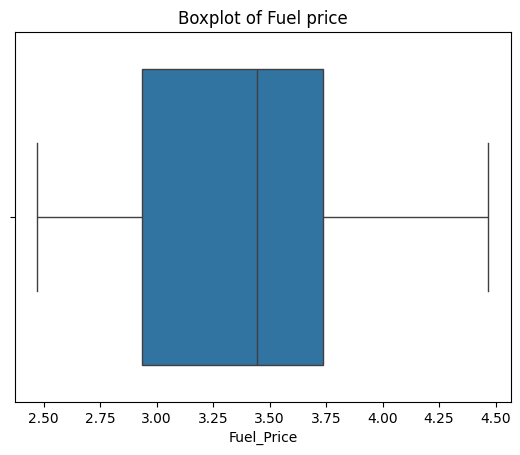

In [10]:
sb.boxplot(x=dataset['Fuel_Price'])
plt.title('Boxplot of Fuel price')
plt.show()

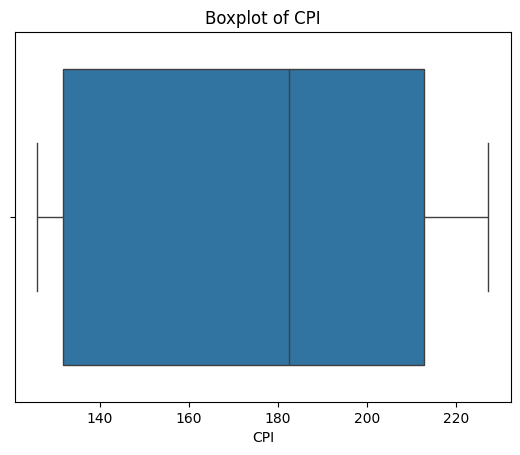

In [11]:
sb.boxplot(x=dataset['CPI'])
plt.title('Boxplot of CPI')
plt.show()

# Visualization

Histograms & KDE for distribution

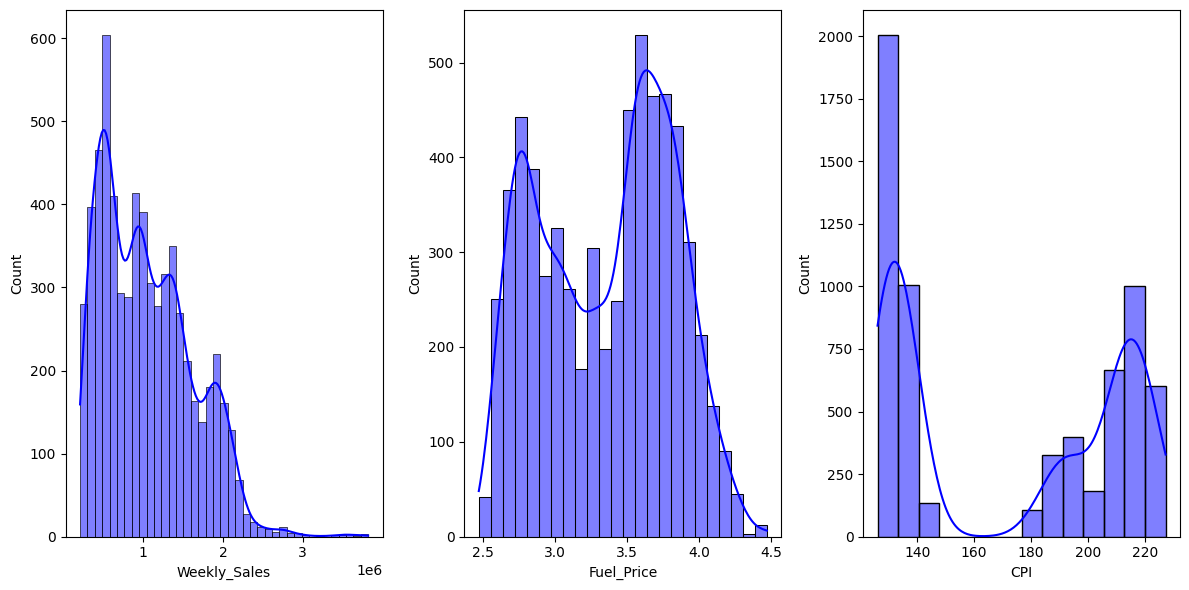

In [12]:
specific_columns = ['Weekly_Sales', 'Fuel_Price', 'CPI']
n_cols = len(specific_columns)
plt.figure(figsize=(12, 6))
for i, col in enumerate(specific_columns): # enumerate is a method to aggregate the plots in the same line
    ax = plt.subplot(1, n_cols, i+1)  # 1 row, n_cols columns, starting from subplot number 1
    sb.histplot(data=dataset[col], color='blue', edgecolor='black', kde=True, ax=ax)
    plt.xlabel(col) #column name from the list
plt.tight_layout()

plt.show()


Distribution for each column

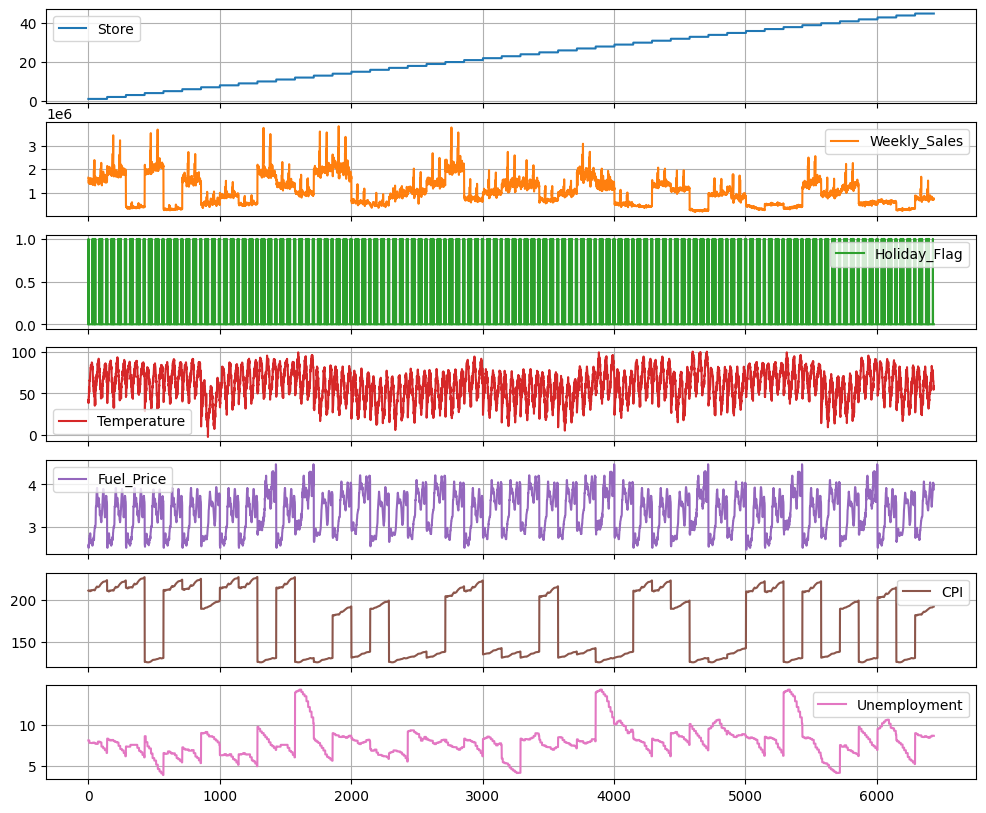

In [13]:
dataset.plot(subplots=True, grid=True, figsize=(12,10));

# Questions (Exploratory Data Analysis)

**a)	Which store has maximum sales?**

In [14]:
total_sales = dataset.groupby('Store')['Weekly_Sales'].sum() #total sales for each store

In [15]:
max_sales_store = total_sales.idxmax() #store with max sales

In [16]:
print("The store with maximum sales is Store num",max_sales_store)

The store with maximum sales is Store num 20


# Answer :The store with maximum sales is Store num 20

**b)	Which store has maximum standard deviation i.e., the sales vary a lot**

In [17]:
std_store=dataset.groupby('Store')['Weekly_Sales'].std() #std for each store

In [18]:
maxstd_store = std_store.idxmax() #store with max std

In [19]:
print ("The store with maximum standard deviation is Store num",maxstd_store)

The store with maximum standard deviation is Store num 14


# Answer :The store with maximum standard deviation is Store num 14

**c) Some holidays have a negative impact on sales. Find out holidays that have higher sales than the mean sales in the non-holiday season for all stores together**

In [20]:
not_holiday=dataset[(dataset['Weekly_Sales']>0) & (dataset['Holiday_Flag']==0)]

In [21]:
not_holiday.Weekly_Sales.mean()

1041256.3802088555

In [22]:
is_holiday=dataset[(dataset['Weekly_Sales']>1041256.3802088555) & (dataset['Holiday_Flag']==1)]

In [23]:
is_holiday

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
31,1,10-09-2010,1507460.69,1,78.69,2.565,211.495190,7.787
42,1,26-11-2010,1955624.11,1,64.52,2.735,211.748433,7.838
47,1,31-12-2010,1367320.01,1,48.43,2.943,211.404932,7.838
53,1,11-02-2011,1649614.93,1,36.39,3.022,212.936705,7.742
...,...,...,...,...,...,...,...,...
5819,41,30-12-2011,1264014.16,1,34.12,3.119,196.358610,6.759
5825,41,10-02-2012,1238844.56,1,22.00,3.103,196.919506,6.589
5855,41,07-09-2012,1392143.82,1,67.41,3.596,198.095048,6.432
6334,45,26-11-2010,1182500.16,1,46.15,3.039,182.783277,8.724


# **Holidays**
Super Bowl: 12-Feb-10, 11-Feb-11, 10-Feb-12, 8-Feb-13

Labour Day: 10-Sep-10, 9-Sep-11, 7-Sep-12, 6-Sep-13

Thanksgiving: 26-Nov-10, 25-Nov-11, 23-Nov-12, 29-Nov-13

Christmas: 31-Dec-10, 30-Dec-11, 28-Dec-12, 27-Dec-13

In [24]:
def check_holiday(date):
    if date in ['12-02-2010', '11-02-2011', '10-02-2012']:
        return 'Super Bowl'
    elif date in ['10-09-2010', '09-09-2011', '07-09-2012']:
        return 'Labour Day'
    elif date in ['26-11-2010', '25-11-2011', '23-11-2012']:
        return 'Thanksgiving'
    elif date in ['31-12-2010', '30-12-2011', '28-12-2012']:
        return 'Christmas'
    else:
        return 'Not-Holiday'

In [25]:
dataset['Holiday Name'] = dataset['Date'].apply(check_holiday)

In [26]:
dataset

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Holiday Name
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106,Not-Holiday
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106,Super Bowl
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106,Not-Holiday
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106,Not-Holiday
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106,Not-Holiday
...,...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684,Not-Holiday
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667,Not-Holiday
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667,Not-Holiday
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667,Not-Holiday


In [27]:
holi_mean = dataset.groupby('Holiday Name').agg(Mean_Weekly_Sales=('Weekly_Sales','mean')).reset_index()

In [28]:
holi_mean

,Holiday Name,Mean_Weekly_Sales
0,Christmas,9.608331e+05
1,Labour Day,1.042427e+06
2,Not-Holiday,1.041256e+06
3,Super Bowl,1.079128e+06
4,Thanksgiving,1.471273e+06


In [29]:
sorted_mean=holi_mean.sort_values(by='Mean_Weekly_Sales')

In [30]:
sorted_mean

,Holiday Name,Mean_Weekly_Sales
0,Christmas,9.608331e+05
2,Not-Holiday,1.041256e+06
1,Labour Day,1.042427e+06
3,Super Bowl,1.079128e+06
4,Thanksgiving,1.471273e+06


# Answer : Labour Day Week, Super Bowl Week and Thanksgiving Week have negative impact on Sales

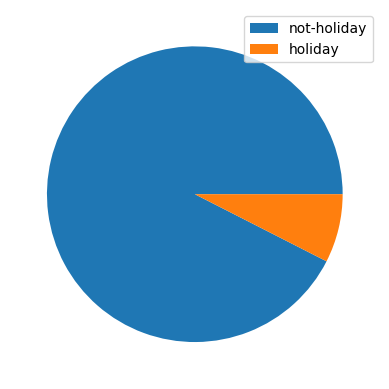

In [31]:
holiday_sales = dataset.groupby("Holiday_Flag")["Weekly_Sales"].sum()
plt.pie(holiday_sales)
plt.legend( ["not-holiday", "holiday"]);
#not holiday's sales more than holidays

**d)	Provide a monthly and semester view of sales in units and give insights.**

In [32]:
dataset['Date']=pd.to_datetime(dataset['Date'],format='mixed')
dataset["Month"]=dataset['Date'].dt.month

In [33]:
counts = dataset["Month"].value_counts()

In [34]:
Monthly_sales=dataset.groupby("Month")["Weekly_Sales"].sum()

In [35]:
monthly_max = Monthly_sales.idxmax()
monthly_min = Monthly_sales.idxmin()

In [36]:
monthly_max

4

In [37]:
monthly_min

1

In [38]:
dataset["Semester"] = "0"
dataset.loc[dataset["Month"].isin([1,2,3,4,5,6]), "Semester"] = "1"
dataset.loc[dataset["Month"].isin([7, 8 ,9,10,11,12]), "Semester"] = "2"

In [39]:
semester_sales = dataset.groupby("Semester")["Weekly_Sales"].sum()

**Monthly sales**

In [40]:
Monthly_sales

Month
1     4.264263e+08
2     5.220257e+08
3     5.534864e+08
4     6.453239e+08
5     6.056966e+08
6     5.750180e+08
7     5.933139e+08
8     5.642317e+08
9     5.905323e+08
10    6.029189e+08
11    4.591693e+08
12    5.990761e+08
Name: Weekly_Sales, dtype: float64

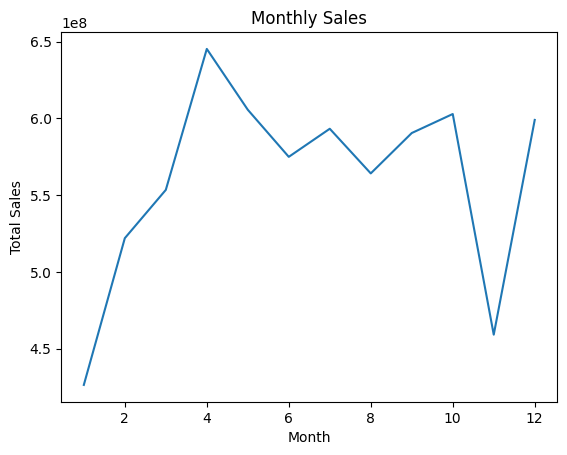

In [41]:
plt.plot(Monthly_sales)
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.title('Monthly Sales')
plt.show()

**Semester Sales**

In [42]:
semester_sales

Semester
1    3.327977e+09
2    3.409242e+09
Name: Weekly_Sales, dtype: float64

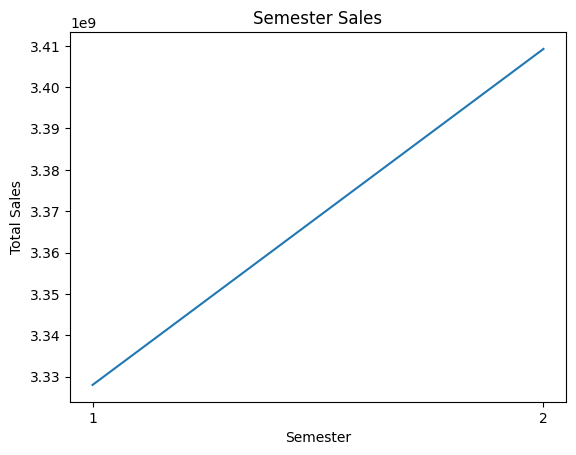

In [43]:
plt.plot(semester_sales)
plt.xlabel('Semester')
plt.ylabel('Total Sales')
plt.title('Semester Sales')
plt.show()

# Answer : Month 4 is the highest sales month , Month 1 is the lowest

#       Semester 2 sales is higher than 1st semester

**e)	Plot the relations between weekly sales vs. other numeric features and give insights**

ScatterPlots for relationships between Weekly sales and other columns


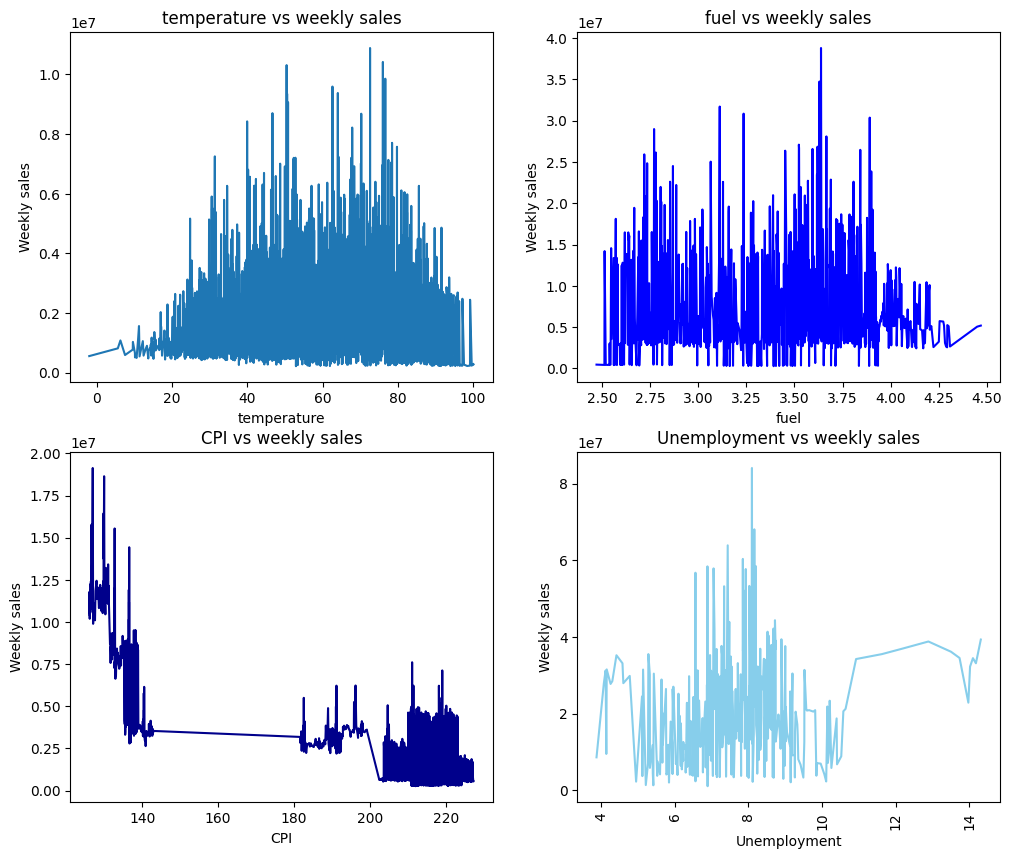

In [44]:
fig, ax = plt.subplots(2, 2, figsize=(12, 10))
#Temp Vs WS
ax[0, 0].set_title("temperature vs weekly sales")
ax[0, 0].set_xlabel("temperature")
ax[0, 0].set_ylabel("Weekly sales")
ax[0, 0].plot(dataset.groupby('Temperature')['Weekly_Sales'].sum())
#Fuel Vs WS
ax[0, 1].set_title("fuel vs weekly sales")
ax[0, 1].set_xlabel("fuel")
ax[0, 1].set_ylabel("Weekly sales")
ax[0, 1].plot( dataset.groupby('Fuel_Price')['Weekly_Sales'].sum(), color = "blue")

#CPI Vs WS
ax[1, 0].set_title("CPI vs weekly sales")
ax[1, 0].set_xlabel("CPI")
ax[1, 0].set_ylabel("Weekly sales")
ax[1, 0].plot(dataset.groupby('CPI')['Weekly_Sales'].sum(), color = "darkblue")

#UnEmp Vs WS
ax[1, 1].set_title("Unemployment vs weekly sales")
ax[1, 1].set_xlabel("Unemployment")
ax[1, 1].set_ylabel("Weekly sales")
plt.xticks(rotation=90 )
ax[1, 1].plot(dataset.groupby('Unemployment')['Weekly_Sales'].sum(), color = "skyblue")

plt.show()

# Answer:

Temp & WS : between 50 and 80 fahrenheit degrees are best sales range

Fuel & WS : Sales when fuel price is higher than 4 is less than when the price is lower than 4

CPI & WS : negative correlation between the CPI and the weekly sales

UnEmp & WS : sales are most in the range between 6 and 8 in the unemployement range